In [20]:
import tomllib

import dill
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as np

%matplotlib inline

import matplotlib as mpl
# mpl.rcParams["font.family"] = "serif"
# mpl.rcParams["font.serif"] = "cm"
# mpl.rcParams["font.usetex"] = True
mpl.rcParams["font.size"] = 20
# mpl.rcParams.keys()

In [21]:
from utils import approximate_divergence, make_plots

0.3_12


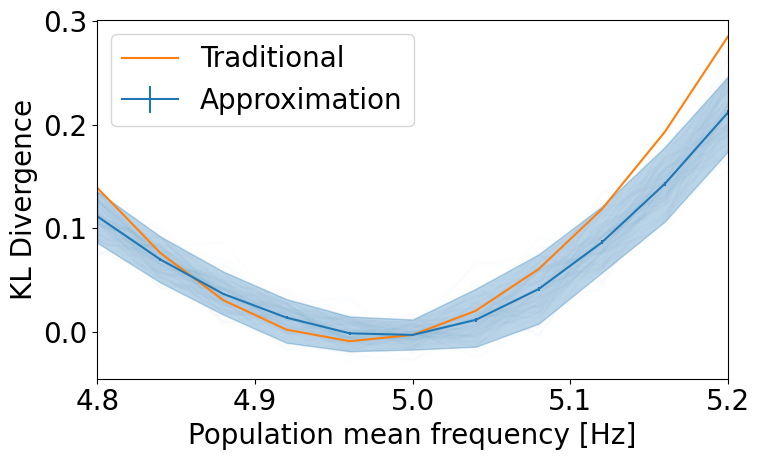

0.35_0


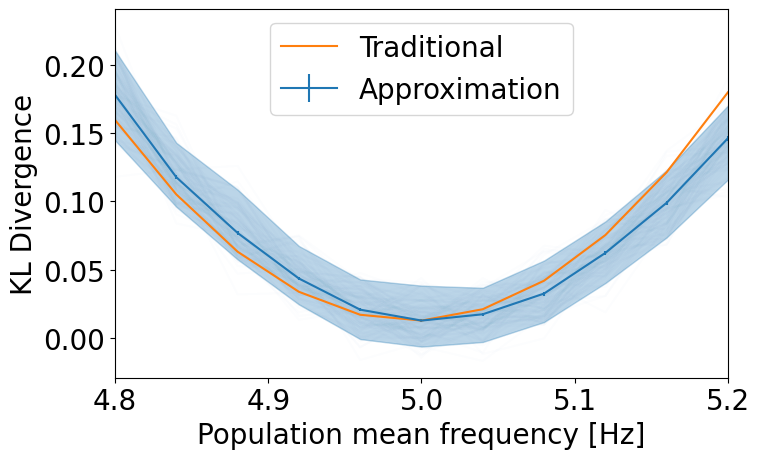

0.45_0


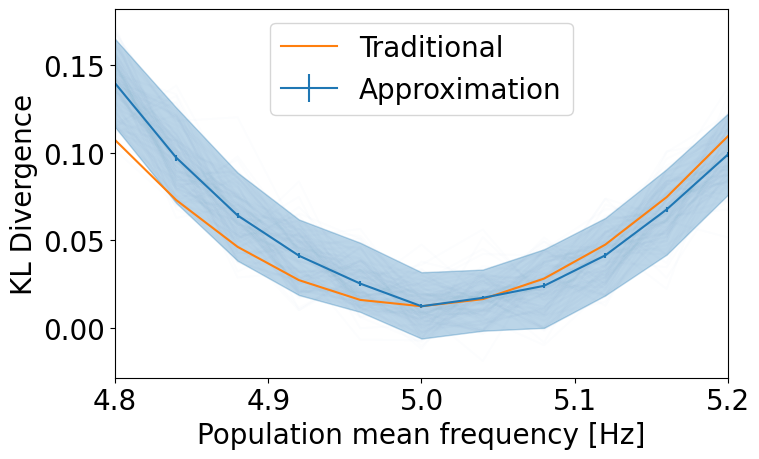

0.65_0


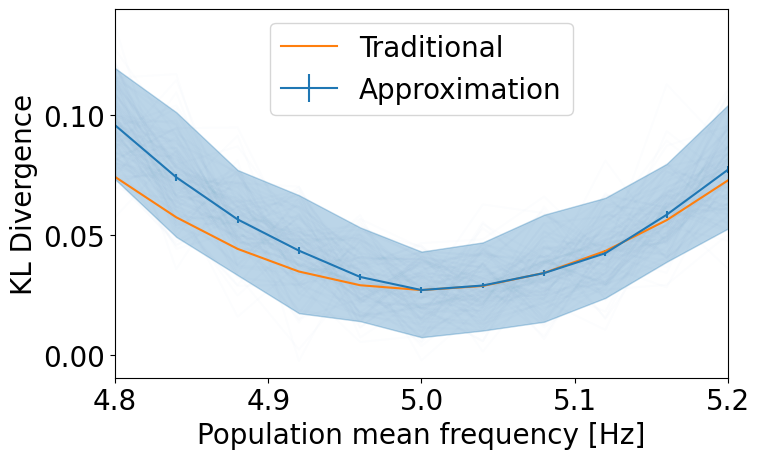

0.85_0


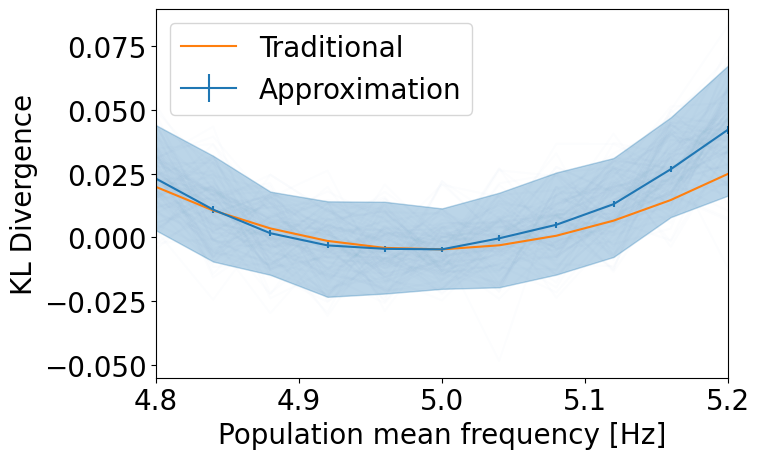

In [60]:
config = tomllib.load(open("sinegaussian_selection.toml", "rb"))

fpeaks = np.linspace(*config["frequency_evaluation_bounds"], config["plot_points"])
# fpeaks = np.linspace(4.9, 5.1, 11)

with open("polyfits.pkl", "rb") as ff:
    pfits = dill.load(ff)


for (sigma_pop, snr_threshold) in zip(
    config["configurations"]["sigma"], config["configurations"]["threshold"]
):
    label = f"{sigma_pop}_{snr_threshold}"

    try:
        kl_divs = np.load(f"kl_divs_{label}.npy")[0]
        fpeak_posteriors = np.load(f"fpeak_posteriors_{label}.npy")
        if fpeak_posteriors.ndim == 1:
            fpeak_posteriors = fpeak_posteriors.reshape(-1, 500)
    except FileNotFoundError:
        continue

    print(label)

    new_divs = np.array([approximate_divergence(fpeak_posteriors.T, mean_frequency, sigma_frequency=sigma_pop) for mean_frequency in fpeaks])
    if sigma_pop in pfits:
        new_divs += np.polyval(pfits[sigma_pop], fpeaks)
        # new_divs -= fpeaks / (fpeaks[-1] - fpeaks[0]) * (new_divs[-1] - new_divs[0])

    kl_divs /= 4

    # new_divs *= 4 / 3
    new_divs += np.mean(kl_divs[5]) - new_divs[5]
    fig = make_plots(fpeaks, kl_divs, new_divs, mode="KL", nevents=25)
    # break

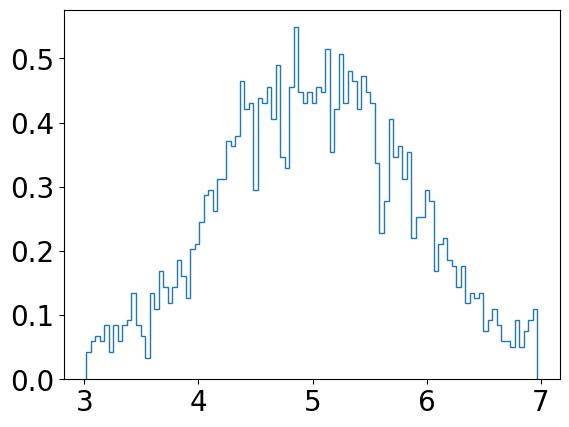

In [30]:
import matplotlib.pyplot as plt
plt.hist(fpeak_posteriors.mean(axis=-1), bins=100, density=True, histtype="step")
plt.show()
plt.close()